In [1]:
import os
os.chdir("../")

import pandas as pd
import numpy as np

import geopandas as gpd
import rasterio
import rioxarray
from shapely.geometry import Point

In [2]:
dc_dem = os.getcwd() + "/data/raster/2018_dc_ndsf.tiff"

In [7]:
r = rioxarray.open_rasterio(dc_dem)
r = r.squeeze().drop(["spatial_ref", "band"])
r.name = "elevation"
rdf = r.to_dataframe().reset_index()
rdf["geometry"] = [Point(x,y) for x, y in zip(rdf["x"], rdf["y"])]

(array([1.37937e+05, 2.05500e+04, 1.10700e+03, 3.51000e+02, 4.60000e+01,
        4.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ -5.8047924 ,   5.53220081,  16.86919403,  28.2061882 ,
         39.54318237,  50.88017273,  62.2171669 ,  73.55416107,
         84.89115143,  96.22814941, 107.56513977]),
 <BarContainer object of 10 artists>)

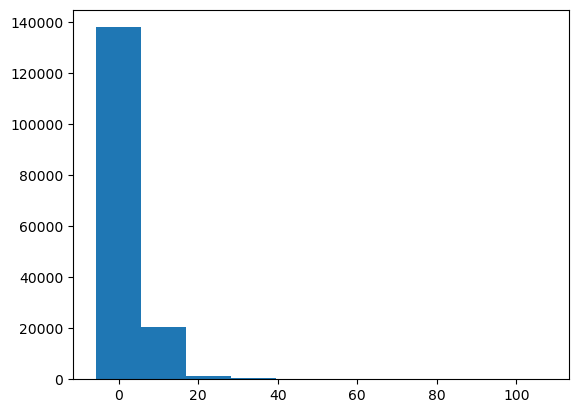

In [11]:
import matplotlib.pyplot as plt
plt.hist(rdf.elevation)